# Income Exploration

## Preliminary Wrangling

This dataset contains atributes regarding their incomes, education, marital status among others of about 48k people aproximately.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [97]:
census_income = pd.read_csv('census_income.csv', sep = ';', na_values = ' ?')

In [98]:
print(census_income.shape)
print(census_income.info())

(1003, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1003 non-null   int64  
 1    workclass       943 non-null    object 
 2    fnlwgt          1003 non-null   int64  
 3    education       1003 non-null   object 
 4    education-num   1003 non-null   int64  
 5    marital-status  1003 non-null   object 
 6    occupation      943 non-null    object 
 7    relationship    1003 non-null   object 
 8    race            1003 non-null   object 
 9    sex             1002 non-null   object 
 10   capital-gain    1002 non-null   float64
 11   capital-loss    1002 non-null   float64
 12   hours-per-week  1002 non-null   float64
 13   native-country  987 non-null    object 
 14   income          1002 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 117.7+ KB
None


In [99]:
#Clean column names from spaces
census_income.rename(columns = lambda x: x.strip().replace('-','_'), inplace = True)
census_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [100]:
#Looking for datasets I came across another dataset with more rows, non duplicated so I decided to  concat this two dataframes.
income_2 = pd.read_csv('adult_incomes.txt', sep = ',', na_values = ' ?', 
                       names = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status', 
                                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
                                'hours_per_week', 'native_country','income'])

In [101]:
print(income_2.shape)
print(income_2.info())

(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [102]:
income = census_income.append(income_2, ignore_index=True, verify_integrity = True)
print(income.shape)
print(income.info())

(33564, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33564 entries, 0 to 33563
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             33564 non-null  int64  
 1   workclass       31668 non-null  object 
 2   fnlwgt          33564 non-null  int64  
 3   education       33564 non-null  object 
 4   education_num   33564 non-null  int64  
 5   marital_status  33564 non-null  object 
 6   occupation      31661 non-null  object 
 7   relationship    33564 non-null  object 
 8   race            33564 non-null  object 
 9   sex             33563 non-null  object 
 10  capital_gain    33563 non-null  float64
 11  capital_loss    33563 non-null  float64
 12  hours_per_week  33563 non-null  float64
 13  native_country  32965 non-null  object 
 14  income          33563 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.8+ MB
None


We can see that income has one row null, as it is our main variable of interest, I have decided to drop that row.

In [103]:
income.dropna(subset = ["income"], inplace=True)
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33563 entries, 0 to 33563
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             33563 non-null  int64  
 1   workclass       31668 non-null  object 
 2   fnlwgt          33563 non-null  int64  
 3   education       33563 non-null  object 
 4   education_num   33563 non-null  int64  
 5   marital_status  33563 non-null  object 
 6   occupation      31661 non-null  object 
 7   relationship    33563 non-null  object 
 8   race            33563 non-null  object 
 9   sex             33563 non-null  object 
 10  capital_gain    33563 non-null  float64
 11  capital_loss    33563 non-null  float64
 12  hours_per_week  33563 non-null  float64
 13  native_country  32965 non-null  object 
 14  income          33563 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 4.1+ MB


In [104]:
income.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [105]:
income.tail(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
33559,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
33560,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
33561,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
33562,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
33563,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0.0,40.0,United-States,>50K


In [106]:
#Clean whitespaces in string data
string_columns = ['workclass', 'education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country',
       'income']
for col in string_columns:
    income[col] = income[col].str.strip()

In [107]:
#Inspect possible categorical values
income.income.unique()

array(['<=50K.', '>50K.', '<=50K', '>50K'], dtype=object)

In [108]:
#Clean '.' from income values
income.income = income.income.str.replace('.','')
income.income.unique()

C:\Users\Rosario\AppData\Local\Temp/ipykernel_8800/3998000214.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  income.income = income.income.str.replace('.','')


array(['<=50K', '>50K'], dtype=object)

In [109]:
#Inspect possible categorical values
income.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

I think this variable is better categorized as Never-married, married, separated and widowed.

In [110]:
mapping = {'married-civ-spouse':'married',
           'married-spouse-absent':'married',
           'married-af-spouse':'married'}
income.marital_status = income.marital_status.str.lower().replace(mapping)

In [111]:
#Inspect possible categorical values
income.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [112]:
#Inspect possible categorical values
income.workclass.unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Found that the ordered levels of the attributes are: 

Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate

In [113]:
#Sorting education values
edu_classes = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad',
               'Prof-school','Assoc-acdm','Assoc-voc','Some-college','Bachelors','Masters','Doctorate']
eclasses=pd.api.types.CategoricalDtype(ordered=True,categories=edu_classes)
income.education=income.education.astype(eclasses)
income.education.unique()

['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', ..., 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']
Length: 16
Categories (16, object): ['Preschool' < '1st-4th' < '5th-6th' < '7th-8th' ... 'Some-college' < 'Bachelors' < 'Masters' < 'Doctorate']

In [114]:
#Inspect numeric fields
income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,33563.000000,3.356300e+04,33563.000000,33563.000000,33563.000000,33563.000000
mean,38.566666,1.896564e+05,10.078896,1089.682835,87.335578,40.440128
std,13.642760,1.053992e+05,2.574179,7448.567188,402.845642,12.342847
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177670e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783410e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370475e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can observe that fields capital_gain and capital_loss have up to 75% of their rows 0 values. It's probable that they didn't have that information.

In [115]:
#Save a copy of the dataset used for the presention slides
income.to_csv('income.csv',index=False)

### What is the structure of your dataset?

There are 33,564 people in this dataset with 15 atributes: 8 nominal variables, 1 ordinal variable and 6 numerical variables.

### What is the main feature(s) of interest in your dataset?

I'm interested in finding the main atributes of people which better predict a lower or higher income in this dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that atributes like workclass, education and occupation have a greater effect on wether people receive a lower or higher income. On the other side, I hope that race and gender don't have any kind of impact in this variable.

## Univariate Exploration

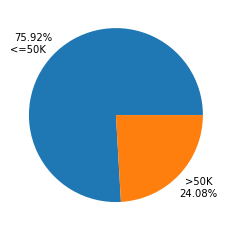

In [116]:
income_counts = income.income.value_counts()
plt.pie(income_counts, autopct=lambda p:f'{p:.2f}%', pctdistance = 1.3, labels = income_counts.index);

We observe that 75.92% of the people in the dataset earn less than 50k dollars and 24.08 more than 50k dollars.

Now, I'll start studying categorical variables: workclass, education and occupation

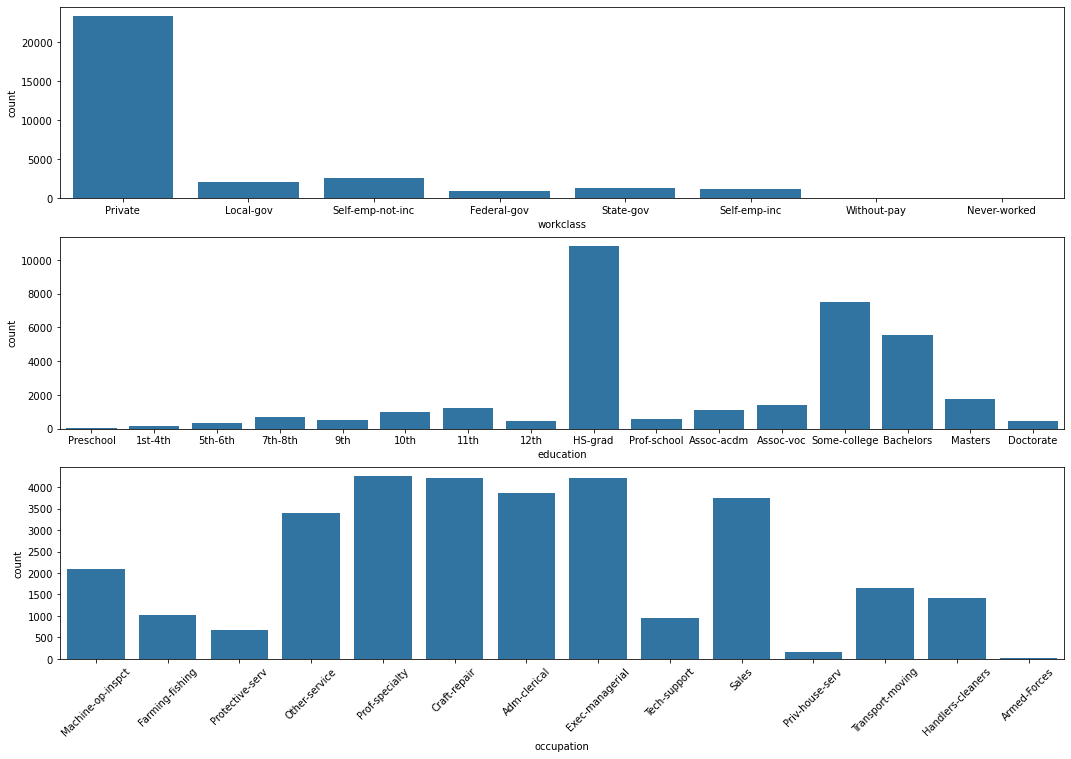

In [117]:
ig, ax = plt.subplots(nrows=3, figsize = [18,12])

default_color = sb.color_palette()[0]
sb.countplot(data = income, x = 'workclass', color = default_color, ax = ax[0])
sb.countplot(data = income, x = 'education', color = default_color, ax = ax[1])
sb.countplot(data = income, x = 'occupation', color = default_color, ax = ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

plt.show()

We can observe that people in this dataset work mostly from the private sector, they're high school graduates and their job varies between a  professional speciality, craft-repair and executive/manager.

Now, I'll be analizing categorical variables: marital_status, relationship, race, sex and native_country

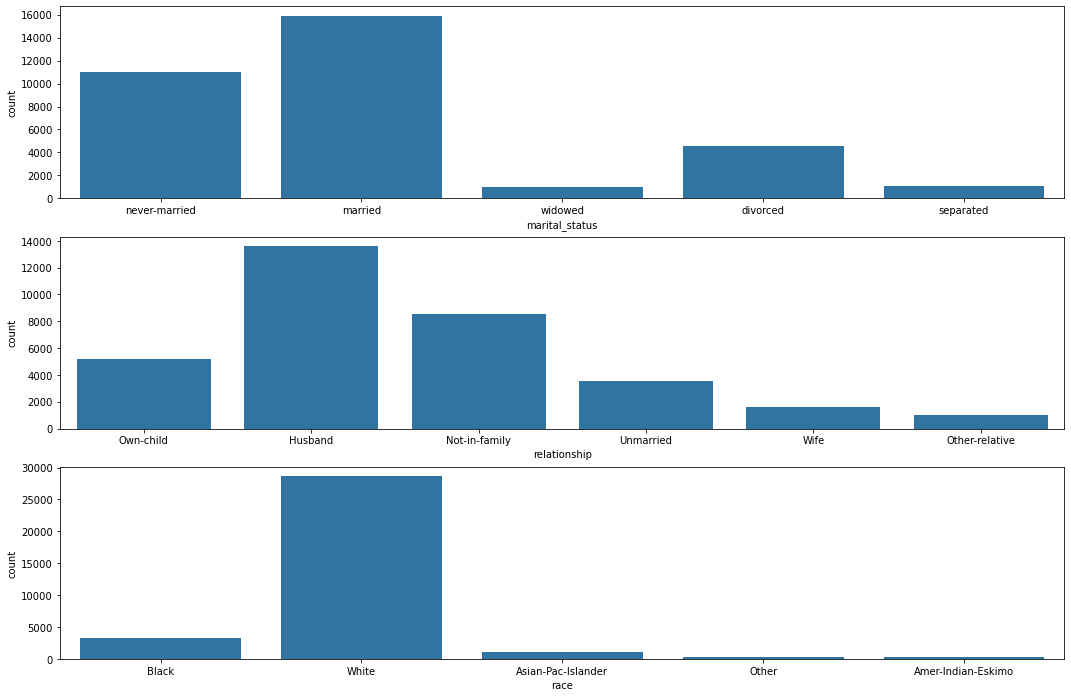

In [118]:
ig, ax = plt.subplots(nrows=3, figsize = [18,12])

sb.countplot(data = income, x = 'marital_status', color = default_color, ax = ax[0])
sb.countplot(data = income, x = 'relationship', color = default_color, ax = ax[1])
sb.countplot(data = income, x = 'race', color = default_color, ax = ax[2])

plt.show()

We can see that in this dataset people are mainly married, a husband (indicating maybe more males) and their race is white, which might be because this study was taken in the United States. 

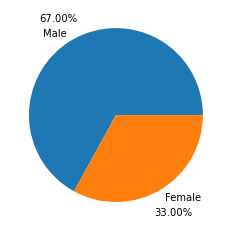

In [119]:
sex_counts = income.sex.value_counts()
plt.pie(sex_counts, autopct=lambda p:f'{p:.2f}%', pctdistance = 1.3, labels = sex_counts.index);

As expected, most of the people in this survey have a male gender represented by 67% while female are 33%.

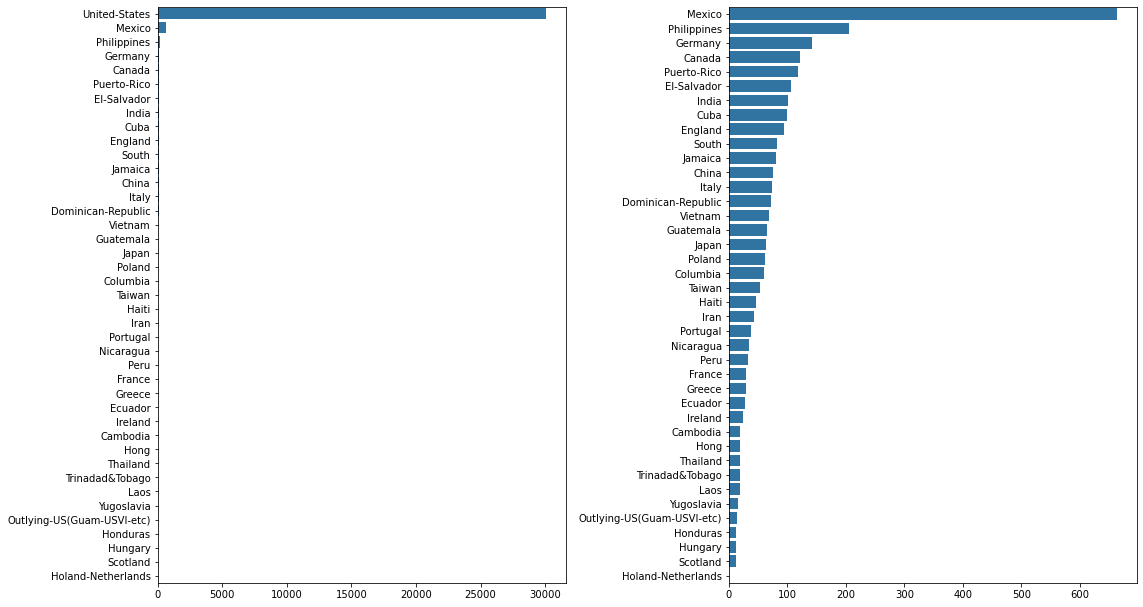

In [120]:
country_counts = income['native_country'].value_counts()
country_counts_no_US = country_counts[country_counts.index!='United-States']
ig, ax = plt.subplots(ncols=2, figsize = [17,10])

sb.barplot(y = country_counts.index, x = country_counts.values, color = default_color, ax = ax[0])
sb.barplot(y = country_counts_no_US.index, x = country_counts_no_US.values, color = default_color, ax = ax[1]);

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

As this study was done in United States, it is expected that most of the people are US Native. If US is not considered, we can see that the second most popular country in this dataset is by far Mexico.

Let's analyze the numerical variables: age and hours_per_week.

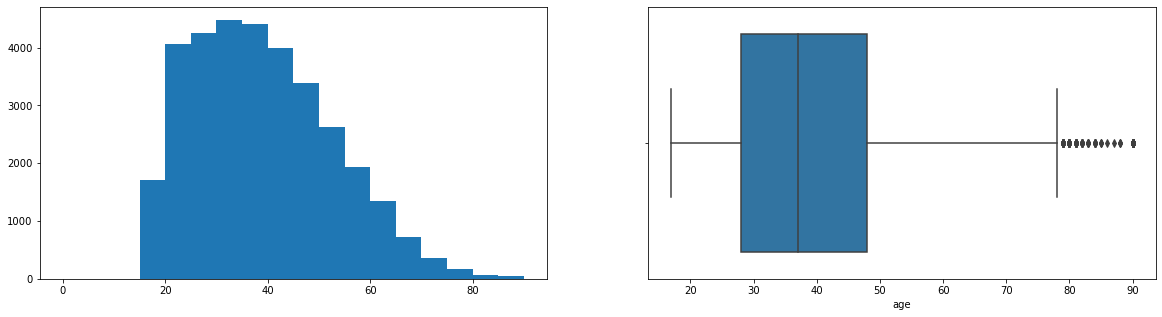

In [121]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
bins = np.arange(0, income.age.max()+5, 5)
plt.hist(data = income, x='age', bins =bins);

plt.subplot(1,2,2)
sb.boxplot(data = income, x='age');

In [122]:
income.age.describe()

count    33563.000000
mean        38.566666
std         13.642760
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

With the histogram we can observe that the age is skewed to the right, most of the people in this dataset fall between 30 and 40 years old. While with the boxplot we can precise that 50% of the data fall between 30 and 50 years old. 

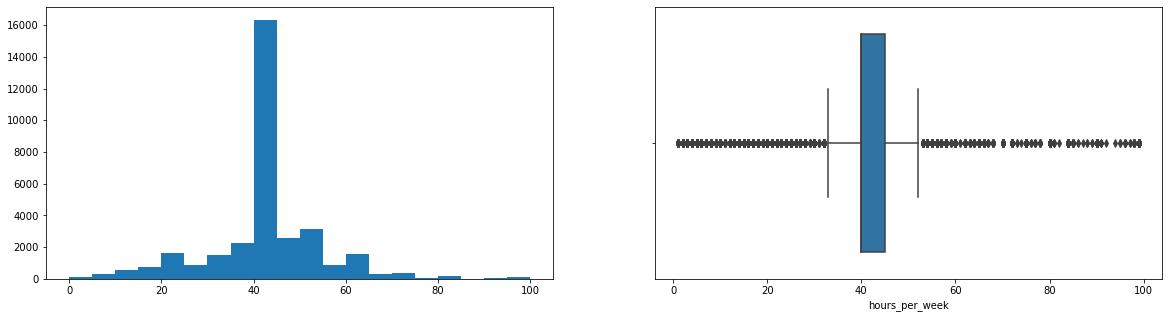

In [123]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
bins = np.arange(0, income.hours_per_week.max()+5, 5)
plt.hist(data = income, x='hours_per_week', bins =bins);
plt.subplot(1,2,2)
sb.boxplot(data = income, x='hours_per_week');

In [124]:
income.hours_per_week.describe()

count    33563.000000
mean        40.440128
std         12.342847
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

We can observe that the majority of people work between 40 and 45 hours which is expected as jobs normally have 8.5 hours per day. It is interesting that there's a maximum of 99 per week which will mean maybe having two jobs or/and working on weekends.

As our variable of interest (income) is a categorical variable maybe it will be interesting to have both of this numerical variables as categories as well.

In [125]:
 income['age_cat'] = pd.cut(income.age,bins=[0,25,45,65,99],labels=['Young','Middle-Age','Senior','Elderly'])

In [126]:
 income['hours_per_week_cat'] = pd.cut(income.hours_per_week,bins=[0,25,40,60,99],labels=['Part-time','Full-time','Overtime','Excessive'])

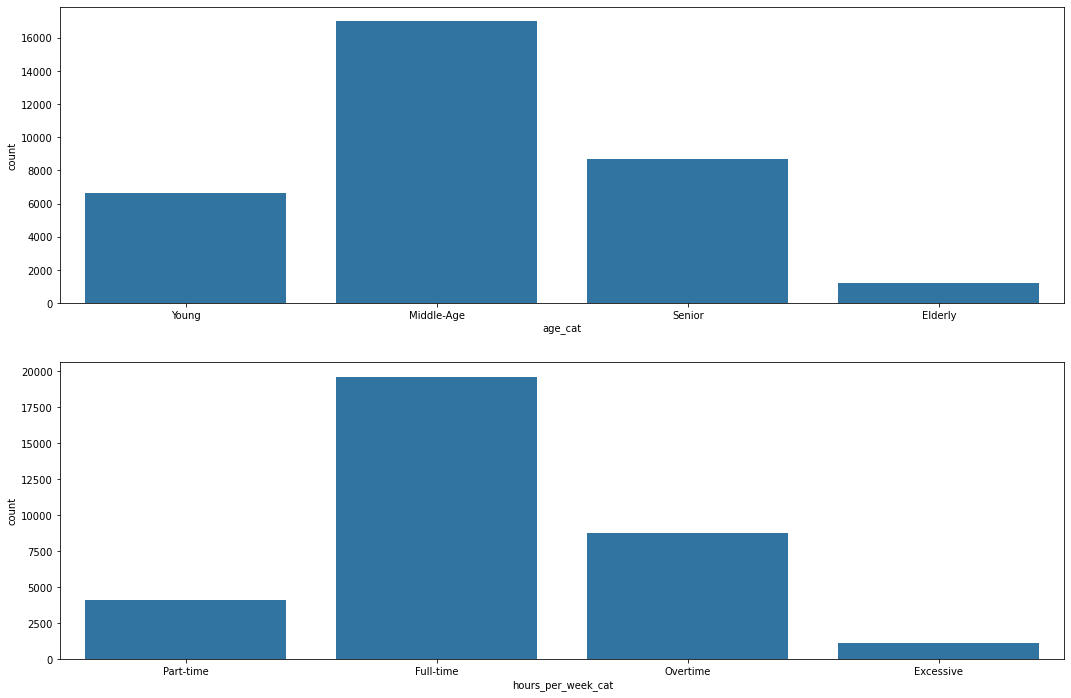

In [127]:
ig, ax = plt.subplots(nrows=2, figsize = [18,12])

sb.countplot(data = income, x = 'age_cat', color = default_color, ax = ax[0])
sb.countplot(data = income, x = 'hours_per_week_cat', color = default_color, ax = ax[1])

plt.show()

As expected, in this dataset we can see that that most of the people are middle-aged adults working full time.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

As mentioned, before an issue that I found interesting was that 25% of the values in working hours per week were more than 80 hours, which means they work in two places. It would be more interested when I crossed each variable with the field income. I didn't perform any transformation in this section. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I consider that each variable followed the expected distribution. For plotting, I used filtered US from the bar plots about counts per native country, as it was difficult to see the counts for the other countries. Also I previously had sorted the education variable so it is in order.

## Bivariate Exploration

In [128]:
numeric_vars = ['age','hours_per_week','education_num']
categoric_vars = ['workclass', 'race', 'sex','income']

<Figure size 720x720 with 0 Axes>

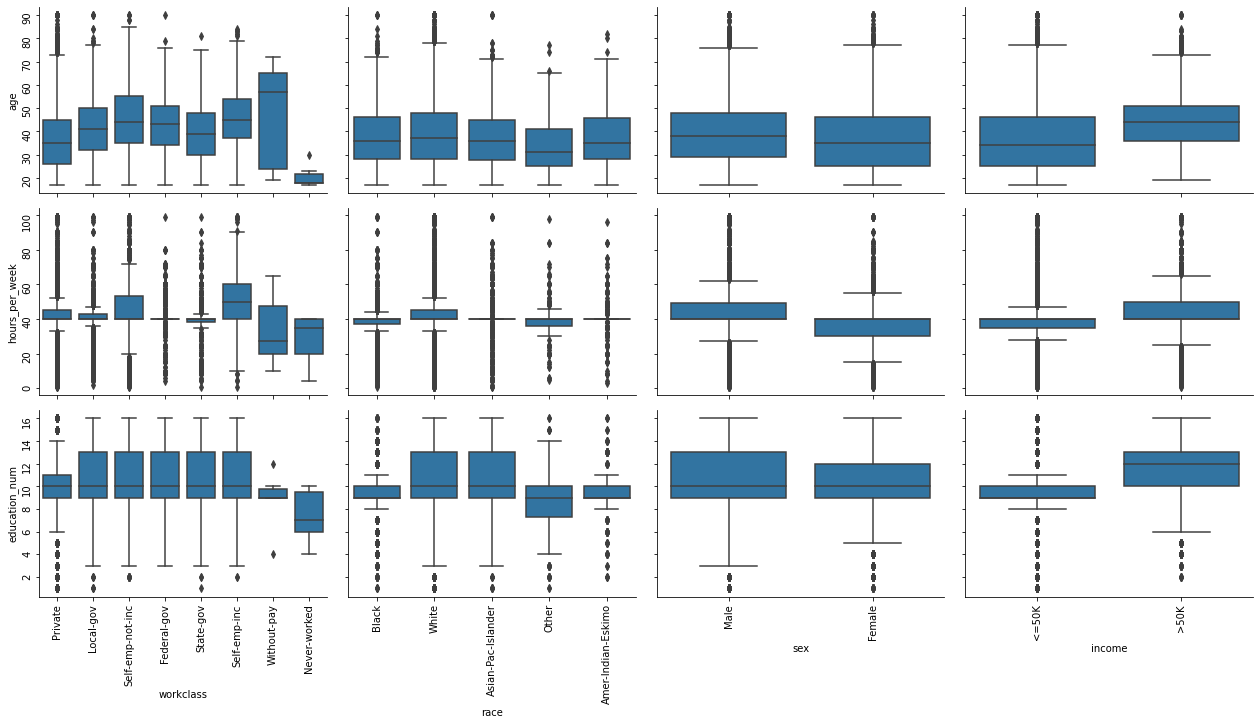

In [129]:
plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = income, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5);
g.map(sb.boxplot, color = default_color);
for ax in g.axes.flatten():
    ax.tick_params(rotation = 90);
plt.show();

The most relevant conclusions obtained about Workclass
* When against age, we can see that as expected people who had never worked have a tight range between 20 and 25's. While people who aren't payed for their job have a wide range of different ages being the median around 60 year's old. The median for private class is lower than other categories.

* Against hours-per week, we can see that the median 40 hours per week is mantained by all workclasses except self employed incorporated whose median is above 40 hours and 50% of them have a wide range of hours per week between 40 and 60 hours. 

* Against education number, we can observe that the median is mantained by all work categories except for without-pay and never worked. The distribution for private  is interesting as 50% of them have a narrower range of education number varying from 9 to 11, while other go from 9 to 13. Without-pay have an even narrower range about 50% of the people vary from 9 to 10 education numbers and for never worked, all of them vary between 4 and 11. This is understandable maybe in the dataset there are students who are starting so they have never worked.

The most relevant conclusions obtained about Race:
* We can see that races like with and Asian-Pacific-Islander seem to have better education numbers as 50% of them go from 11 to 13 education points. American-Indian-Escimo and Black seem to have the same distribution while other category have the lower median.

The most relevant conclusions obtained about sex
* Against hours per wee, it seems that the median in Females is a little lower than Male. As 50% of women work from around 30 to 40 hours while men from 40 to 50 hours per week. 
* Education numbers seem also be wider for Male, as 75% of them have about 13 points as most while women have around 12 as most.

The most relevant conclusions obtained about income
* Against education we can see that clearly, who has a better income has a median higher than who has a lower income. 50% of the ones who have an income greater than 50k,  have up to 13 education points at most while, who have lower income have 11 points at most.
    

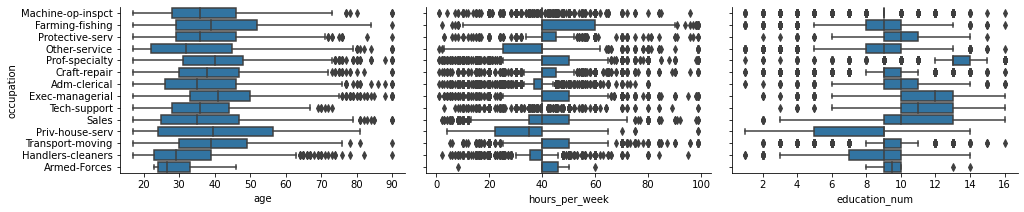

In [130]:
g = sb.PairGrid(data = income, x_vars = numeric_vars, y_vars = ['occupation'],
                height = 3, aspect = 1.5)
g.map(sb.boxplot, color = default_color);
plt.show();

We can observe that the private house service has a major variability in age as 50% of them are between 25 and 55 years old and the one with the least variability is Armed Forces where 50% of them are between 25 and 32.

Besides, when talking about hours per week, we can see that people who work less than 40 hours have jobs as handlers/cleaners, private house services, adm clerical and other services. While the job that mostly demand working more than 40 hours is farming/fishing. 

Finally, comparing with education we can see that people from professional specialty have higher education numbers by far, on second place we find occupations like Executive managerial and tech support as 50% of them have an education number from 10 to 13 points. On the other side, we can see that private house service have lower education numbers.

Other variables will be seen in detail later in this analysis.

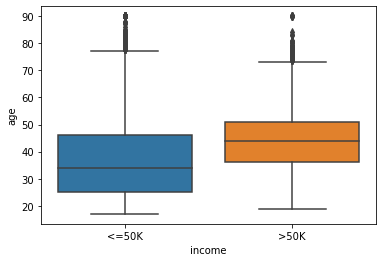

In [131]:
sb.boxplot(data = income, x='income', y='age');

This plot show us that the median age of the people who earn greater than 50k is around 45 years old, and for the people who earn less than 50k is 35. Now let's analyze the income against age_category.

<Figure size 1080x576 with 0 Axes>

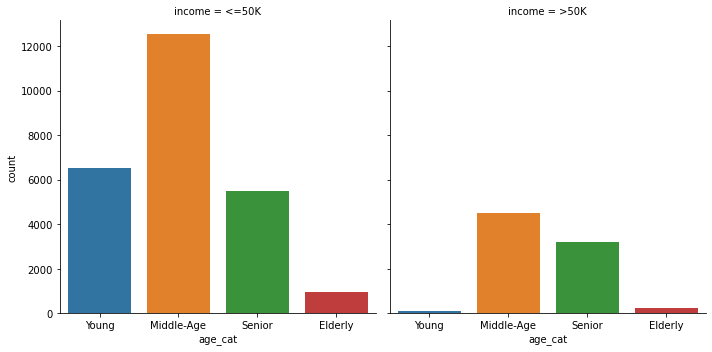

In [132]:
plt.figure(figsize = [15,8])
sb.catplot(data = income, x='age_cat', col = 'income', kind= "count");

We can observe that for both groups of income, middle-Age people represent the majority. As seen in the univariate analysis this group had the majority. I consider that using the percentage of the total instead of the count will generate a better insight because the dataset is unbalanced

In [133]:
age_percent = income.groupby(['age_cat'])['income'].value_counts(normalize = True)
age_percent = age_percent.mul(100).rename('Percent').reset_index()
age_percent

,age_cat,income,Percent
0,Young,<=50K,98.175238
1,Young,>50K,1.824762
2,Middle-Age,<=50K,73.533384
3,Middle-Age,>50K,26.466616
4,Senior,<=50K,63.081162
5,Senior,>50K,36.918838
6,Elderly,<=50K,80.033557
7,Elderly,>50K,19.966443


<Figure size 1080x576 with 0 Axes>

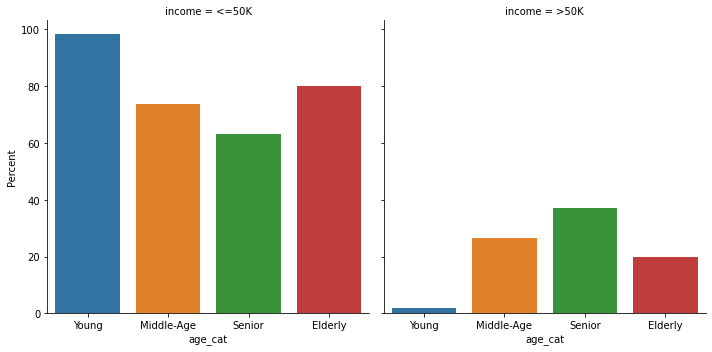

In [134]:
plt.figure(figsize = [15,8])
sb.catplot(data = age_percent, x='age_cat', y = 'Percent', col = 'income', kind= "bar");

We can see that the young group has a major proportion of people earning less than 50k, elderly people as the second group. While the senior and middle age has a major proportion of people earning more than 50k.

In [135]:
#Function to plot bar percentages of a nominal variable per income category
def percent_per_income(var,data = income,orientation = 'vertical'):
    var_data = data.groupby(var)['income'].value_counts(normalize = True)
    var_data = var_data.mul(100).rename('Percent').reset_index()
    print(var_data)
    if orientation == 'vertical':
        plt.figure(figsize = [10,10])
        g = sb.barplot(y=var, x="Percent", hue="income", data=var_data);
    else:
        plt.figure(figsize = [10,5])
        g = sb.barplot(x=var, y="Percent", hue="income", data=var_data);

           workclass income     Percent
0        Federal-gov  <=50K   61.631420
1        Federal-gov   >50K   38.368580
2          Local-gov  <=50K   70.620945
3          Local-gov   >50K   29.379055
4       Never-worked  <=50K  100.000000
5            Private  <=50K   78.150541
6            Private   >50K   21.849459
7       Self-emp-inc   >50K   55.565142
8       Self-emp-inc  <=50K   44.434858
9   Self-emp-not-inc  <=50K   71.406786
10  Self-emp-not-inc   >50K   28.593214
11         State-gov  <=50K   72.416357
12         State-gov   >50K   27.583643
13       Without-pay  <=50K  100.000000


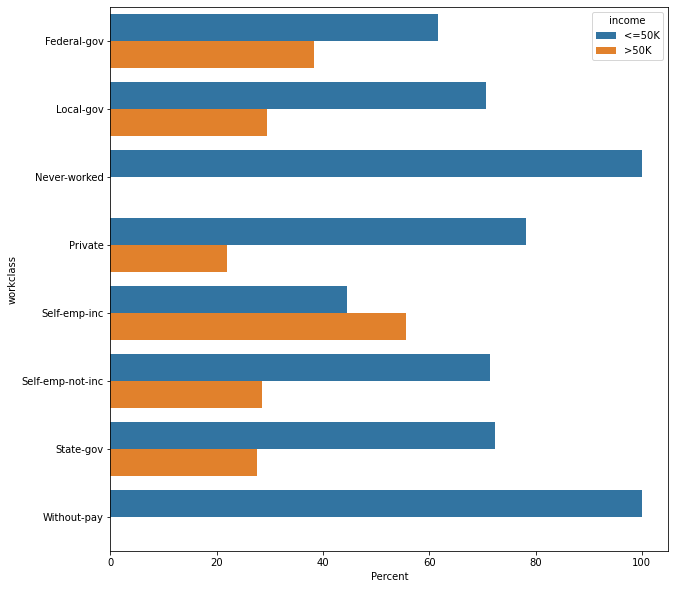

In [136]:
percent_per_income('workclass')

From the people who earn money, not considering never-worked or without pay, we can see that people who work for a private company have the major percentage when talking about the first group, followed by state government and self-employed not incorporation. On the other hand, we see that for the second group, self -employed incorporation and federal-government in second place has a major proportion with almost 55%.

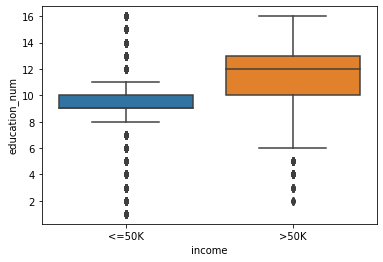

In [137]:
sb.boxplot(data = income, x='income', y='education_num');

Observing this plot, we can see that people 50% of the people with income greater than 50k has education numbers from 10 to 13 while people with income less than 50K has a narrow and minor range from 9 to 10, indicating that the more education you have, it is more probable to earn more. Let's see what education category indicates.

       education income     Percent
0      Preschool  <=50K  100.000000
1        1st-4th  <=50K   95.953757
2        1st-4th   >50K    4.046243
3        5th-6th  <=50K   95.058140
4        5th-6th   >50K    4.941860
5        7th-8th  <=50K   93.853073
6        7th-8th   >50K    6.146927
7            9th  <=50K   94.328922
8            9th   >50K    5.671078
9           10th  <=50K   93.367876
10          10th   >50K    6.632124
11          11th  <=50K   95.004095
12          11th   >50K    4.995905
13          12th  <=50K   92.533937
14          12th   >50K    7.466063
15       HS-grad  <=50K   83.954948
16       HS-grad   >50K   16.045052
17   Prof-school   >50K   73.489933
18   Prof-school  <=50K   26.510067
19    Assoc-acdm  <=50K   75.023041
20    Assoc-acdm   >50K   24.976959
21     Assoc-voc  <=50K   73.995772
22     Assoc-voc   >50K   26.004228
23  Some-college  <=50K   80.942869
24  Some-college   >50K   19.057131
25     Bachelors  <=50K   58.716094
26     Bachelors   >50K   41

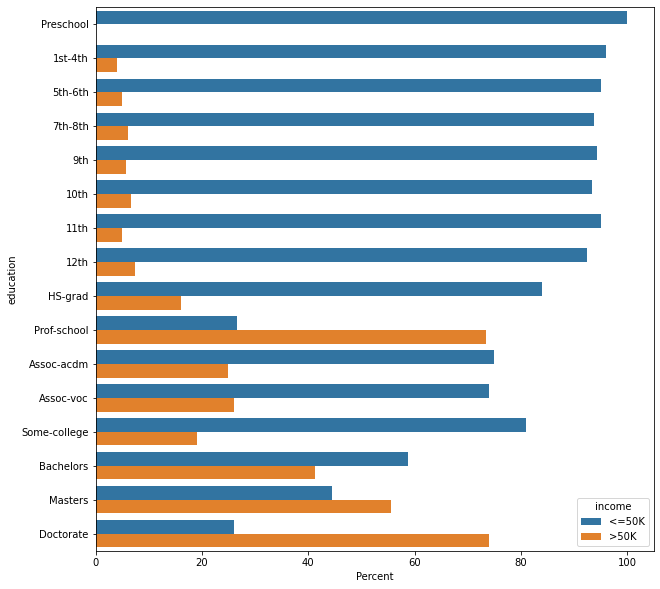

In [138]:
percent_per_income('education')

Observing these graphs, as expected, people with a higher education have a greater probability for a better income as we can see that from the people who went to Professional school, with a Doctorate and a Masters Degree 73.5%, 73.9& and 55% respectively earn more than 50k.

           occupation income    Percent
0        Adm-clerical  <=50K  86.570248
1        Adm-clerical   >50K  13.429752
2        Armed-Forces  <=50K  90.000000
3        Armed-Forces   >50K  10.000000
4        Craft-repair  <=50K  77.237123
5        Craft-repair   >50K  22.762877
6     Exec-managerial  <=50K  51.781473
7     Exec-managerial   >50K  48.218527
8     Farming-fishing  <=50K  88.401559
9     Farming-fishing   >50K  11.598441
10  Handlers-cleaners  <=50K  93.587033
11  Handlers-cleaners   >50K   6.412967
12  Machine-op-inspct  <=50K  87.571977
13  Machine-op-inspct   >50K  12.428023
14      Other-service  <=50K  95.791642
15      Other-service   >50K   4.208358
16    Priv-house-serv  <=50K  99.350649
17    Priv-house-serv   >50K   0.649351
18     Prof-specialty  <=50K  54.944797
19     Prof-specialty   >50K  45.055203
20    Protective-serv  <=50K  67.708333
21    Protective-serv   >50K  32.291667
22              Sales  <=50K  73.217623
23              Sales   >50K  26.782377


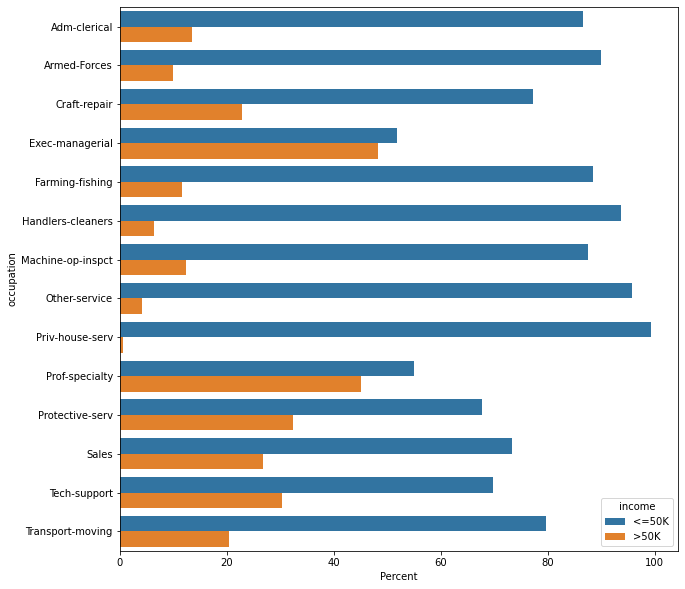

In [139]:
percent_per_income('occupation')

Observing this graphs we can see that occupations like exec-managerial and professional specialties have major proportion of people earning more with 48% and 45% respectively. Although, seen these percentages so low, I consider that this variable doesn't have a greater effect in the income. 

      sex income    Percent
0  Female  <=50K  89.004243
1  Female   >50K  10.995757
2    Male  <=50K  69.474340
3    Male   >50K  30.525660


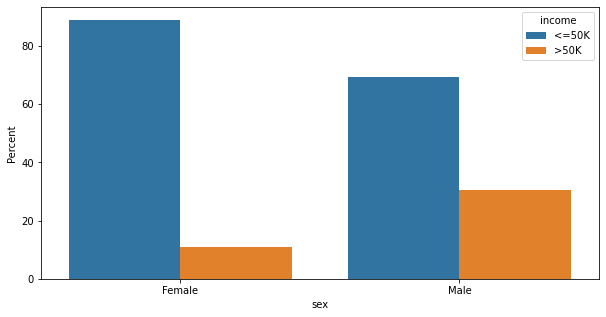

In [140]:
percent_per_income('sex',orientation = 'horizontal')

We can observe that a minor proportion of the women in this dataset are earning more than 50k, about 10% while on the other hand Male are 30%. Despite this, I consider this variable isn't determinative as both percentages are below 50%.

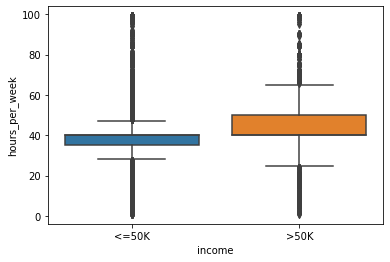

In [141]:
sb.boxplot(data = income, x='income', y='hours_per_week');

In [142]:
income[income['income'] == '<=50K'].hours_per_week.describe()

count    25481.000000
mean        38.844433
std         12.300160
min          1.000000
25%         35.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [143]:
income[income['income'] == '>50K'].hours_per_week.describe()

count    8082.000000
mean       45.471047
std        11.060720
min         1.000000
25%        40.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: hours_per_week, dtype: float64

We observe that people who earn less than 50k, 75% work at most 40 hours, while people who earn more than 50k, at most 50 hours. With the boxplot, we can confirm that 50% of the people in the first group worked between 30 and 50 hours while in the second group they have a wider range from around 30 to 70 hours a week. We can say that working more hours can lead you to earn more.

  hours_per_week_cat income    Percent
0          Part-time  <=50K  93.300493
1          Part-time   >50K   6.699507
2          Full-time  <=50K  80.471655
3          Full-time   >50K  19.528345
4           Overtime  <=50K  59.237201
5           Overtime   >50K  40.762799
6          Excessive  <=50K  63.388938
7          Excessive   >50K  36.611062


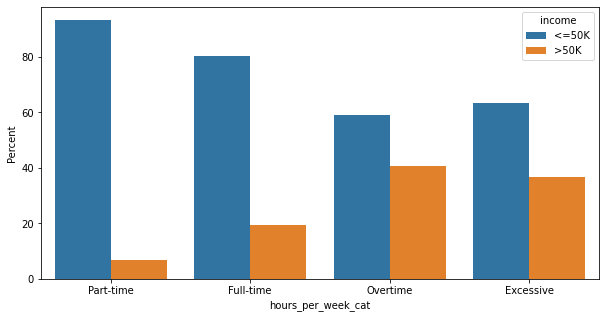

In [145]:
percent_per_income('hours_per_week_cat',orientation = 'horizontal')

Interestingly, it appears that, although working hours can lead you to earn more, it is less probable when you work excessive hours, as the proportion of people working excessive hours and earning more than 50k is around 23%. People who work overtime have a better proportion with 38%

                 race income    Percent
0  Amer-Indian-Eskimo  <=50K  88.679245
1  Amer-Indian-Eskimo   >50K  11.320755
2  Asian-Pac-Islander  <=50K  73.664480
3  Asian-Pac-Islander   >50K  26.335520
4               Black  <=50K  87.434231
5               Black   >50K  12.565769
6               Other  <=50K  90.647482
7               Other   >50K   9.352518
8               White  <=50K  74.421849
9               White   >50K  25.578151


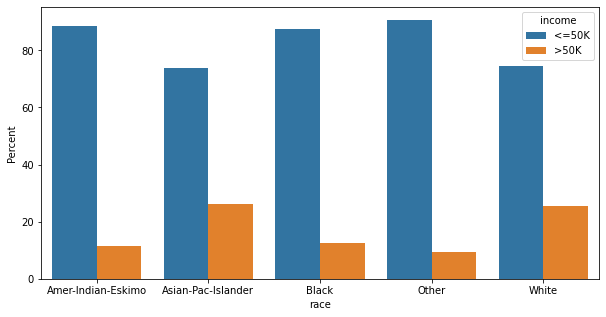

In [147]:
percent_per_income('race',orientation = 'horizontal')

Race doesn't seem to have a great impact in income, as proportions for people with income greater than 50k are lower than 40%.

  marital_status income    Percent
0       divorced  <=50K  89.530290
1       divorced   >50K  10.469710
2        married  <=50K  56.356784
3        married   >50K  43.643216
4  never-married  <=50K  95.441337
5  never-married   >50K   4.558663
6      separated  <=50K  93.490566
7      separated   >50K   6.509434
8        widowed  <=50K  91.527094
9        widowed   >50K   8.472906


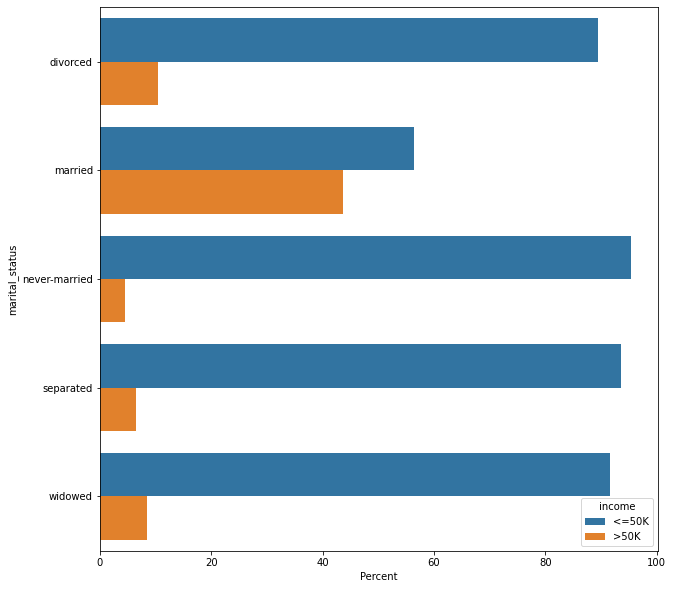

In [148]:
percent_per_income('marital_status')

We can see that from the people who are married, around 50% of them  have an income greater than 50K. Nevertheless, as the other categories have low proportions, marital status doesn't seem to have a great effect in income.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

An interesting relationship was found between income vs age, vs education, vs hours per week and vs occupation. 
- Income vs Age:
Either with boxplots with the age in a numeric variable or barplots with age category, we could observe that income greater than 50k was mostly earned by people from around 45 years old, considered in the senior age, while on the other hand people with income less than 50k was mostly from people considered young. 

- Income vs education:
When talking about education, people with higher education like bachelors, masters and doctorates as well as professional schools had a major percentage of people with income greater than 50k. 

- Income vs hours per week:
The boxplot of hours per week by income, shows that from the people who earn more than 50k, 50% of them worked from 40 to 50 hours. Interestingly, the barplot with income by hours per week category, suggested that although people who work more obtained better income, working excessive hours didn't lead to earn more. 

- Income vs occupation:
It was interesting to find that although one may think that occupation influences in the amount of income, in this dataset it can't be seen clearly this influences. Executive and managerial jobs as well as professional specialty had a great propotion of people earning more than 50k, it only represented less than 50% of them.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Interesting relationships were found between age, hours per week and workclass and occupation.
- Age vs Workclass, We could observe that people who never worked have a tight range between 20 and 25's unlike people who work without pay who have a wide range of age from 20 to 70. 
- Age vs occupation, We can observe that the private house service has a major variability in age while the one with the least variability is Armed Forces where 50% where under 32.
- Hours per week vs workclass, we could observe that workclass with people working more than 40 hours are mostly self employed. 
- Hours per week vs occupation, we could observe that people working less than 40 hours had mostly occupations like private house services and other services, while, people who worked more than 50 hours where mostly farming and fishing. 

## Multivariate Exploration

From the previous analysis, we found that variables such as age, education, hours per week, occupation and workclass made interesting relationships against each other and against income. In this part, we are going deeper into this variables.

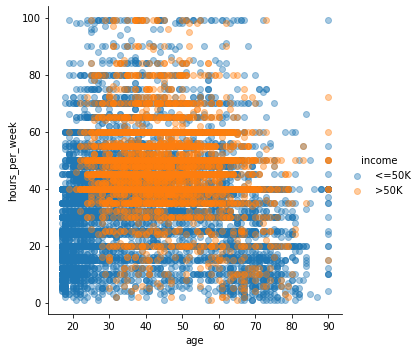

In [149]:
g = sb.FacetGrid(data = income, hue = 'income', height = 5)
g.map(plt.scatter, 'age','hours_per_week', alpha = 0.4)
g.add_legend();

Although, we can't observe a clear relationship between hours per week and age, income greater than 50k seems to be more concentrated in hours per week between 40 and 60 and middle ages, confirmingly previous conclusions. Outliers kept my attention, for example what are the features of the people who are 90 years old and worked more than 40 hours.

In [150]:
income.query('income==">50K" & age==90 & hours_per_week > 40')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_cat,hours_per_week_cat
899,90,Private,149069,Assoc-acdm,12,married,Sales,Husband,White,Male,0.0,1825.0,50.0,United-States,>50K,Elderly,Overtime
6373,90,Local-gov,227796,Masters,14,married,Exec-managerial,Husband,White,Male,20051.0,0.0,60.0,United-States,>50K,Elderly,Overtime
6409,90,Private,51744,Masters,14,never-married,Exec-managerial,Not-in-family,Black,Male,0.0,0.0,50.0,United-States,>50K,Elderly,Overtime
9809,90,Private,87372,Prof-school,15,married,Prof-specialty,Husband,White,Male,20051.0,0.0,72.0,United-States,>50K,Elderly,Excessive
11548,90,Private,175491,HS-grad,9,married,Craft-repair,Husband,White,Male,9386.0,0.0,50.0,Ecuador,>50K,Elderly,Overtime


It is really interesting to found that 5 people at 90 years old work overtime to get paid more than 50k. What is more from this group, there is one that works excessive hours in a professional job, not managerial as one would expected, and another person that has only study high school and as a craft-repair has managed to earn that income.

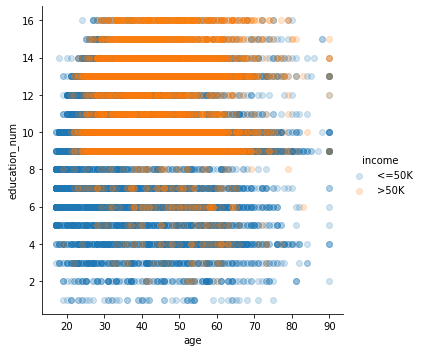

In [151]:
g = sb.FacetGrid(data = income, hue = 'income', height = 5)
g.map(plt.scatter, 'age','education_num',alpha = 0.2)
g.add_legend()

Clearly, there isn't any relationship between education and age as one could think. Despite this, we can confirm what we have seen previously which is that income greater than 50k is more frequent when education number is greater as well.

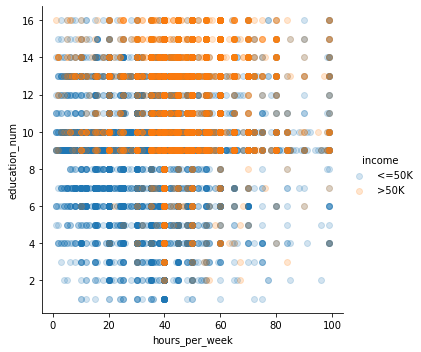

In [152]:
g = sb.FacetGrid(data = income, hue = 'income', height = 5)
g.map(plt.scatter, 'hours_per_week','education_num',alpha = 0.2)
g.add_legend()

Again, this plot shows that there isn't a particular relationship between education and hours per week. Although, we can see that income is more probable to be less than 50k when working less than 40 hours per week and the education number is less than 8.

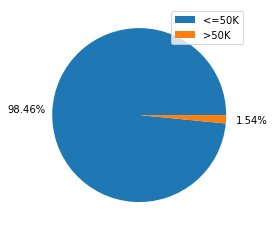

In [153]:
data = income.query('education_num<8 & hours_per_week < 40')
income_counts = data.income.value_counts()
plt.pie(income_counts, autopct=lambda p:f'{p:.2f}%', pctdistance = 1.3)
plt.legend(labels = income_counts.index);

As we can see, only 1.54% of this group, earns more than 50k.

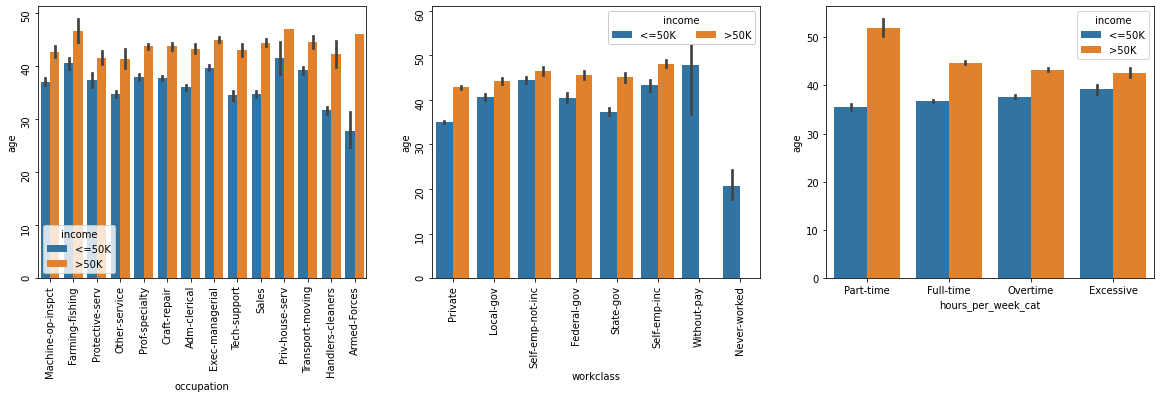

In [154]:
ig, ax = plt.subplots(ncols=3, figsize = [20,5])

sb.barplot(data = income, x = 'occupation', y = 'age', hue = 'income', ax = ax[0])
ax[0].tick_params(rotation = 90)

sb.barplot(data = income, x = 'workclass', y = 'age', hue = 'income', ax = ax[1])
ax[1].legend(loc = 1, ncol = 3, framealpha = 1, title = 'income')
ax[1].tick_params(rotation = 90)

sb.barplot(data = income, x = 'hours_per_week_cat', y = 'age', hue = 'income', ax = ax[2]);


These graphs demonstrates that it is frequent that older people earn more than 50k despite the occupation, workclass and hours per week. For example in Armed Forces we can see that the average age for earning less than 50k is around 29 while for earning mora than 50k is around 45. We can see a great difference in age as well in hours per week category where the average age in part time for earning more than 50k is around 50, and for earning less than 50k is around 35.

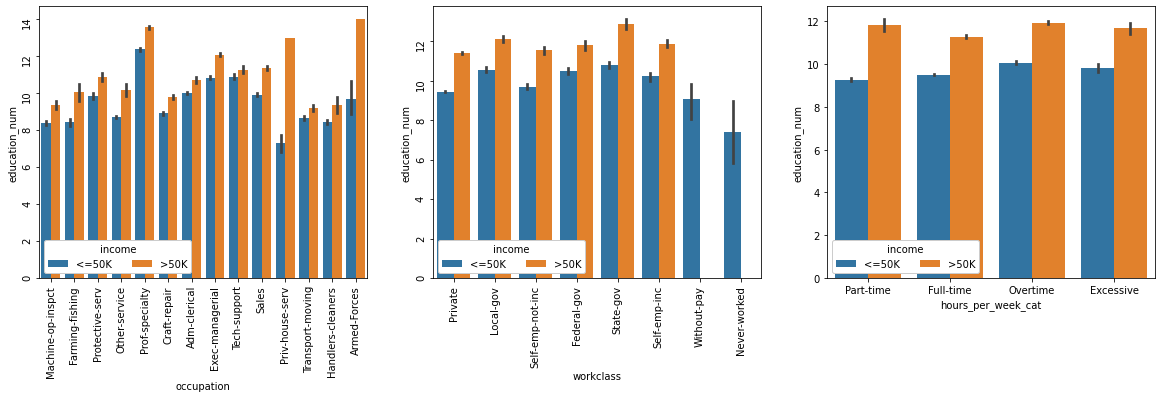

In [155]:
ig, ax = plt.subplots(ncols=3, figsize = [20,5])

sb.barplot(data = income, x = 'occupation', y = 'education_num', hue = 'income', ax = ax[0])
ax[0].legend(loc = 3, ncol = 3, framealpha = 1, title = 'income')
ax[0].tick_params(rotation = 90)

sb.barplot(data = income, x = 'workclass', y = 'education_num', hue = 'income', ax = ax[1])
ax[1].legend(loc = 3, ncol = 3, framealpha = 1, title = 'income')
ax[1].tick_params(rotation = 90)

sb.barplot(data = income, x = 'hours_per_week_cat', y = 'education_num', hue = 'income', ax = ax[2])
ax[2].legend(loc = 3, ncol = 3, framealpha = 1, title = 'income')

These graphs shows us that higher education means better income, surprisingly we can see great difference in education points for two types of occupation: private house services and armed forces. On the other hand, there are occupations where the difference in education per type of income is minimum like tech support and transportation-moving. 

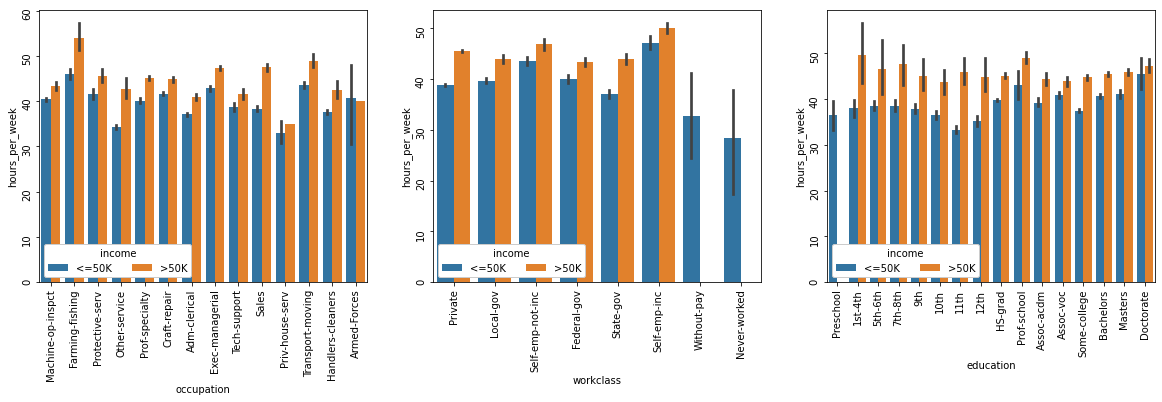

In [156]:
ig, ax = plt.subplots(ncols=3, figsize = [20,5])

sb.barplot(data = income, x = 'occupation', y = 'hours_per_week', hue = 'income', ax = ax[0])
ax[0].legend(loc = 3, ncol = 3, framealpha = 1, title = 'income')
ax[0].tick_params(rotation = 90)

sb.barplot(data = income, x = 'workclass', y = 'hours_per_week', hue = 'income', ax = ax[1])
ax[1].legend(loc = 3, ncol = 3, framealpha = 1, title = 'income')
ax[1].tick_params(rotation = 90)

sb.barplot(data = income, x = 'education', y = 'hours_per_week', hue = 'income', ax = ax[2])
ax[2].legend(loc = 3, ncol = 3, framealpha = 1, title = 'income')
ax[2].tick_params(rotation = 90)

These graphs show us the average work hours for people with better income is greater than for people with lower income. For example, this means a great difference in occupation for Farming and fishing, Sales and other services; in workclass for Private and state government and for education for people with at most 12th grade. 

On the other hand, it doesn't mean a great difference for occupations like tech support, house service and even for armed forces seems like its the other side around, people who earn more works less hours on average than who earn less.   

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This multivariate exploration confirmed the observations made previously,it is demostrated that income variable is influenced by education, hours per week and age. Futhermore, one could say that according to this dataset, income is greater for people at an older age, who work more hours but not excessively and whose education is higher. 

### Were there any interesting or surprising interactions between features?

It was interesting to see that there were some occupations were these three variables demonstrate great difference per income category like Armed Forced and Private Houses services were education numbers make a huge difference per income category. Also, it was interesting to find that there was a considerable difference in average hours per week per income for people with education less than high school. 